In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals import joblib
from datetime import datetime

import sys
sys.path.insert(0, 'G:/work/GitHub/ml_baseline_things/functions/')
sys.path.insert(0, 'G:/work/GitHub/ml_baseline_things/featureSelector/')
import supportFunctions as sf
import featureEngineringFunctions as fef
from feature_selector import FeatureSelector

from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [2]:
def to_source_columns_order (featureSet, featureRightOrder):
    return [feature for feature in featureRightOrder if feature in featureSet]

In [6]:
#dataTrain, dataTrainTarget, dataTest, dataTrainScaled, dataTestScaled = sf.load_modified_data('data_modified/dataModified.pkl')
featureListLElev = [
'AGE_lev_train',
'Age-Class_cnt_train',
'Deck_LE_train',
'FamilySize_cnt_train',
'Fare_lev_train',
'HasBloodRelatives_train',
'HasWifeHasb_train',
'IsAlone_train',
'Pclass_cnt_train',
'SEX_LE_train',
'Title_LE_train'
]
dataTrain = fef.create_dataset_from_features (featureListLElev, '2.1-featuresPack/')
dataTrainTarget =fef.create_dataset_from_features (['Survived_train'], '2.1-featuresPack/')

In [8]:
dataTrain.head()


,Age_lev,Age*Class,Deck_LE,FamilySize,Fare_lev,HasBloodRelatives,HasWifeHasb,IsAlone,Pclass,Sex_LE,Title_LE
0,1,66.0,7,2,0,0,1,0,3,1,2
1,2,38.0,2,2,4,0,1,0,1,0,3
2,1,78.0,7,1,1,0,0,1,3,0,1
3,2,35.0,2,2,4,0,1,0,1,0,3
4,2,105.0,7,1,1,0,0,1,3,1,2


In [5]:
pd.DataFrame(dataTrain.columns)

,0
0,Age_lev
1,Age*Class
2,Deck_LE
3,FamilySize
4,Fare_lev
5,HasBloodRelatives
6,HasWifeHasb
7,IsAlone
8,Pclass
9,Sex_LE


## SelectKBest

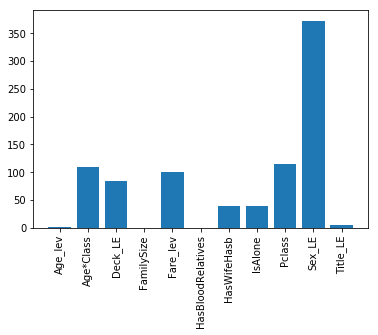

In [10]:
fCount = 8

#f_classif
selector = SelectKBest(f_classif, k=fCount)
selector.fit(dataTrain, dataTrainTarget)
#scores = np.log10(selector.scores_)
scores = selector.scores_

plt.bar(range(len(dataTrain.columns)), scores)
plt.xticks(range(len(dataTrain.columns)), dataTrain.columns, rotation='vertical')
plt.show()

In [11]:
fScores = pd.DataFrame(selector.scores_, columns=['fScores'])
topFScores = (
    fScores.join(pd.DataFrame(dataTrain.columns, columns=['fName']))
    .sort_values(by='fScores', ascending=False)
    .head(fCount)
    #.sort_index()
    .fName)
selectedFeatures1 = to_source_columns_order(list(topFScores), dataTrain.columns)
#list(topFScores)
#dataTrain[selectedFeatures].head()
selectedFeatures1

['Age*Class',
 'Deck_LE',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

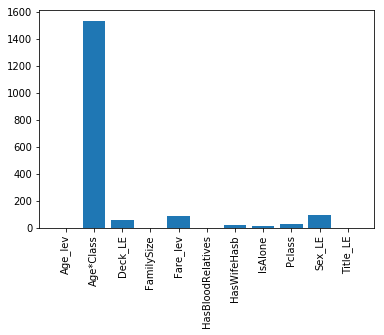

In [12]:
#chi2
selector = SelectKBest(chi2, k=fCount)
selector.fit(dataTrain, dataTrainTarget)
#scores = np.log10(selector.scores_)
scores = selector.scores_

plt.bar(range(len(dataTrain.columns)), scores)
plt.xticks(range(len(dataTrain.columns)), dataTrain.columns, rotation='vertical')
plt.show()

In [13]:
fScores = pd.DataFrame(scores, columns=['fScores'])
topFScores = (
    fScores.join(pd.DataFrame(dataTrain.columns, columns=['fName']))
    .sort_values(by='fScores', ascending=False)
    .head(fCount)
    #.sort_index()
    .fName)
selectedFeatures2 = to_source_columns_order(list(topFScores), dataTrain.columns)
selectedFeatures2

['Age*Class',
 'Deck_LE',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

In [14]:
selectedFeatures1and2 = to_source_columns_order(set(selectedFeatures1) & set(selectedFeatures2), dataTrain.columns)
selectedFeatures1xor2 = to_source_columns_order(set(selectedFeatures1) ^ set(selectedFeatures2), dataTrain.columns)

print ('Both feature selections iters have these features:\n')
print (selectedFeatures1and2,'\n')
print ('Only in one feature selection: \n')
print (selectedFeatures1xor2,'\n')

Both feature selections iters have these features:

['Age*Class', 'Deck_LE', 'Fare_lev', 'HasWifeHasb', 'IsAlone', 'Pclass', 'Sex_LE', 'Title_LE'] 

Only in one feature selection: 

[] 



## Using pure logistic regression

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lrModel = LogisticRegression()
lrModel.fit(dataTrain, dataTrainTarget)

fScores = lrModel.coef_[0]

topFScores = pd.DataFrame(dataTrain.columns, columns=['fName'])
topFScores["Correlation"] = pd.Series(fScores)
topFScores["CorrelationAbs"] = abs(topFScores["Correlation"])

topFScores = ( 
    topFScores
    .sort_values(by='CorrelationAbs', ascending=False)
    .head(fCount)
    #.sort_index()
    .fName)
selectedFeaturesLR = to_source_columns_order(list(topFScores), dataTrain.columns)
selectedFeaturesLR


['Age_lev',
 'FamilySize',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

In [16]:
selectedFeatures12andLR = to_source_columns_order(set(selectedFeatures1and2) & set(selectedFeaturesLR), dataTrain.columns)
selectedFeatures12xorLR = to_source_columns_order(set(selectedFeatures1xor2) ^ set(selectedFeaturesLR), dataTrain.columns)
print ('Both feature selections iters have these features:\n')
print (selectedFeatures12andLR, '\n')
print ('Only in one feature selection: \n')
print (selectedFeatures12xorLR)

Both feature selections iters have these features:

['Fare_lev', 'HasWifeHasb', 'IsAlone', 'Pclass', 'Sex_LE', 'Title_LE'] 

Only in one feature selection: 

['Age_lev', 'FamilySize', 'Fare_lev', 'HasWifeHasb', 'IsAlone', 'Pclass', 'Sex_LE', 'Title_LE']


## Selecting features using FeatureSelectorTool

In [17]:
fs = FeatureSelector(data = dataTrain, labels = dataTrainTarget)

In [18]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

1 features with a single unique value.

1 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.494191	valid_0's auc: 0.86706
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[134]	valid_0's binary_logloss: 0.443221	valid_0's auc: 0.865306
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.430834	valid_0's auc: 0.867262
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.431311	valid_0's auc: 0.85991
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.360588	valid_0's auc: 0.906117
Traini

In [19]:
fs.ops

{'collinear': ['IsAlone'],
 'low_importance': ['IsAlone', 'HasWifeHasb', 'HasBloodRelatives'],
 'missing': [],
 'single_unique': ['HasBloodRelatives'],
 'zero_importance': ['HasBloodRelatives']}

In [20]:
tempFeaturesSet = set (fs.ops.get('low_importance') + fs.ops.get('zero_importance') + fs.ops.get('single_unique'))
selectedFeaturesFSTool = to_source_columns_order(set(dataTrain.columns) - tempFeaturesSet, dataTrain.columns)
selectedFeaturesFSTool

['Age_lev',
 'Age*Class',
 'Deck_LE',
 'FamilySize',
 'Fare_lev',
 'Pclass',
 'Sex_LE',
 'Title_LE']

## Feature Extraction with RFE

In [21]:
# 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, fCount)
fit = rfe.fit(dataTrain, dataTrainTarget)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features Indexes: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))
selectedFeaturesRFElr = list(dataTrain.columns[fit.support_])
selectedFeaturesRFElr

Num Features: 8
Selected Features Indexes: [ True False False  True  True False  True  True  True  True  True]
Feature Ranking: [1 3 2 1 1 4 1 1 1 1 1]


['Age_lev',
 'FamilySize',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

In [23]:
import xgboost as xgb
# feature extraction
model = xgb.XGBClassifier(n_jobs=-1)
rfe = RFE(model, 8)
fit = rfe.fit(dataTrain, dataTrainTarget)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features Indexes: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))
selectedFeaturesRFExgb = list(dataTrain.columns[fit.support_])
selectedFeaturesRFExgb

Num Features: 8
Selected Features Indexes: [ True  True  True  True  True False False False  True  True  True]
Feature Ranking: [1 1 1 1 1 4 3 2 1 1 1]


['Age_lev',
 'Age*Class',
 'Deck_LE',
 'FamilySize',
 'Fare_lev',
 'Pclass',
 'Sex_LE',
 'Title_LE']

## Feature Importance with Extra Trees

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(dataTrain, dataTrainTarget)
print(model.feature_importances_)

scores = model.feature_importances_

fScores = pd.DataFrame(scores, columns=['fScores'])
topFScores = (
    fScores.join(pd.DataFrame(dataTrain.columns, columns=['fName']))
    .sort_values(by='fScores', ascending=False)
    .head(fCount)
    .fName)

selectedFeaturesFI = to_source_columns_order(list(topFScores), dataTrain.columns)
selectedFeaturesFI


[0.03723232 0.28101085 0.06588874 0.07495207 0.07453067 0.
 0.01490358 0.01109049 0.08671284 0.254741   0.09893744]


['Age_lev',
 'Age*Class',
 'Deck_LE',
 'FamilySize',
 'Fare_lev',
 'Pclass',
 'Sex_LE',
 'Title_LE']

## Final Selecting features

In [25]:
#TODO как визуализировать выбранные признаки?
selectedFeatures1

['Age*Class',
 'Deck_LE',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

In [26]:
selectedFeatures2

['Age*Class',
 'Deck_LE',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

In [27]:
selectedFeaturesLR

['Age_lev',
 'FamilySize',
 'Fare_lev',
 'HasWifeHasb',
 'IsAlone',
 'Pclass',
 'Sex_LE',
 'Title_LE']

In [28]:
selectedFeaturesFSTool

['Age_lev',
 'Age*Class',
 'Deck_LE',
 'FamilySize',
 'Fare_lev',
 'Pclass',
 'Sex_LE',
 'Title_LE']

## delete duplicates

In [24]:
#comment this line if ready
selectedFeatures1 = ['Pclass',
 #'Sex',
 #'Fare',
 'SexD_0',
 'SexD_1',
 #'Title',
 'TitleD_1',
 'TitleD_2',
 'TitleD_3',
 'IsAlone',
 'HasWifeHasb',
 'Age*Class',
 'FareBands',
 'DeckF',
 'DeckD_U']

selectedFeatures2 = ['Pclass',
 #'Sex',
 #'Fare',
 'SexD_0',
 'SexD_1',
 #'Title',
 'TitleD_1',
 'TitleD_2',
 'TitleD_3',
 'HasWifeHasb',
 'Age*Class',
 'FareBands',
 'DeckF',
 'DeckD_B',
 'DeckD_U']

selectedFeaturesLR

#selectedFeaturesFSTool

selectedFeaturesAll = list(dataTrain.columns)

## Save to disk

In [29]:
#choice sets to pack
packfOfSelectedFeatures = [
    #selectedFeatures1,
    #selectedFeatures2,
    #selectedFeaturesLR,
    #selectedFeaturesFSTool,
    selectedFeaturesRFElr,
    selectedFeaturesRFExgb,
    selectedFeaturesFI
]
packfOfSelectedFeatures

[['Age_lev',
  'FamilySize',
  'Fare_lev',
  'HasWifeHasb',
  'IsAlone',
  'Pclass',
  'Sex_LE',
  'Title_LE'],
 ['Age_lev',
  'Age*Class',
  'Deck_LE',
  'FamilySize',
  'Fare_lev',
  'Pclass',
  'Sex_LE',
  'Title_LE'],
 ['Age_lev',
  'Age*Class',
  'Deck_LE',
  'FamilySize',
  'Fare_lev',
  'Pclass',
  'Sex_LE',
  'Title_LE']]

In [27]:
comment this line if ready
_ = joblib.dump(packfOfSelectedFeatures, 
            open('selectedFeatures/selectedFeatures--{}.pkl'.format(datetime.now().strftime("%Y-%m-%d--%H-%M")), 'wb'), 9)